In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# using google colab & importing csv from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/My Drive/creditcard.csv"
df = pd.read_csv(path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# checking shape
df.shape

(284807, 31)

In [ ]:
# checking numeric distribution
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#  columnwise chekcing dtypes, null, etc 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# checking values of fraud & non_fraud related records
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# finding % of above
(df.groupby('Class')['Class'].count()/df['Class'].count())*100

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64

In [ ]:
# checking corr
df_corr = df.corr()
df_corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,2.438580e-16,2.422086e-16,-2.115458e-16,9.352582e-16,-3.252451e-16,6.308789e-16,-5.011524e-16,2.870125e-16,1.818128e-16,1.036959e-16,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,9.468995e-16,-6.588252e-16,3.854521e-16,-2.541036e-16,2.831060e-16,4.934097e-17,-9.883008e-16,2.636654e-16,9.528280e-17,-9.309954e-16,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,-5.501758e-17,2.206522e-16,-6.883375e-16,4.271336e-16,1.122756e-16,1.183364e-15,4.576619e-17,5.427965e-16,2.576773e-16,-9.429297e-16,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,-2.083600e-16,-5.657963e-16,-1.506129e-16,-8.522435e-17,-1.507718e-16,-6.939204e-16,-4.397925e-16,1.493667e-16,-2.656938e-16,-3.223123e-16,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,-6.601716e-16,7.342759e-16,3.761033e-16,-9.578659e-16,-3.634803e-16,-5.132620e-16,-3.517076e-16,1.425729e-16,1.109525e-15,-3.138234e-16,2.076048e-16,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,2.850776e-16,4.865799e-16,2.140589e-16,-2.268061e-16,3.452801e-16,-6.368111e-18,-2.477917e-16,3.567582e-16,2.811474e-16,2.717167e-16,1.898638e-16,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,3.043333e-17,-1.084105e-15,1.510045e-15,-9.892325e-17,-1.729462e-16,1.936832e-17,2.893672e-16,1.149692e-15,-1.116789e-16,-2.874017e-16,1.744242e-16,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,1.954747e-16,-6.266057e-17,-2.382948e-16,-1.131098e-16,2.021491e-16,5.027192e-16,-3.508777e-16,-4.093852e-16,-5.339821e-16,-1.095534e-16,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,-2.771761e-16,4.682341e-16,-2.445230e-15,-2.650351e-16,2.343317e-

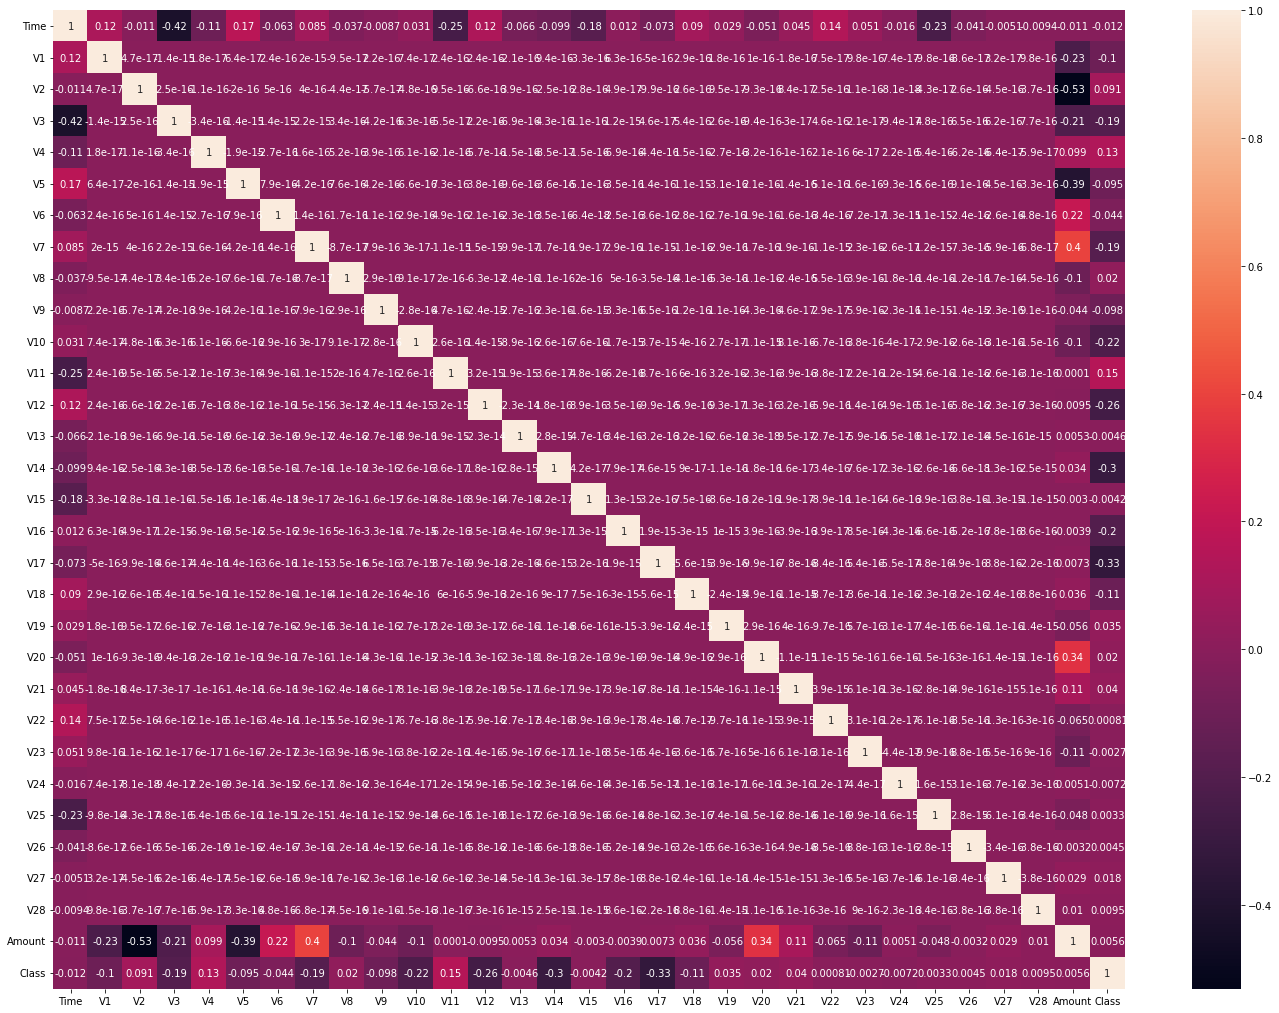

In [ ]:
# plotting corr on heatmap
plt.figure(figsize=(24,18))
sns.heatmap(df_corr, annot=True)
plt.show()

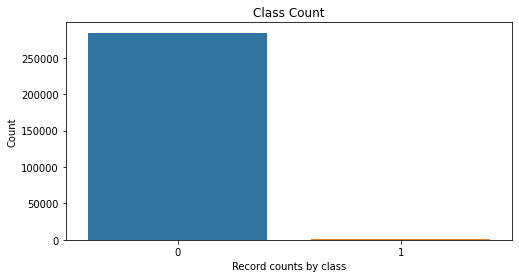

In [ ]:
# bar plot class count
plt.figure(figsize=(8,4))
sns.countplot(df['Class'])
plt.title("Class Count", fontsize=12)
plt.xlabel("Record counts by class", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.show()

In [ ]:
# dropping any duplicates (note: formerly the df.shape = ) 
df.drop_duplicates(subset=None, inplace=True)

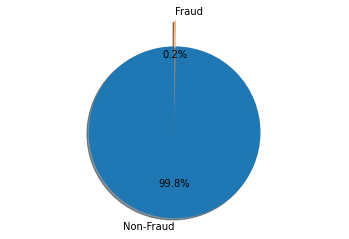

In [ ]:
#plotting %ages
classes=df['Class'].value_counts()
nonfraud_class=classes[0]/df['Class'].count()*100
fraud_class=classes[1]/df['Class'].count()*100

labels = 'Non-Fraud', 'Fraud'
sizes = [nonfraud_class, fraud_class]
explode = (0, 0.3) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

In [ ]:
# Total Cases: 284807
# Fraud Cases: 492 
# Fraud%: 0.2%
# Non-Fraud Cases: 284315 
# Non-Fraud%: 99.83% 

Text(0.5, 1, 'Time vs Class Distribution')

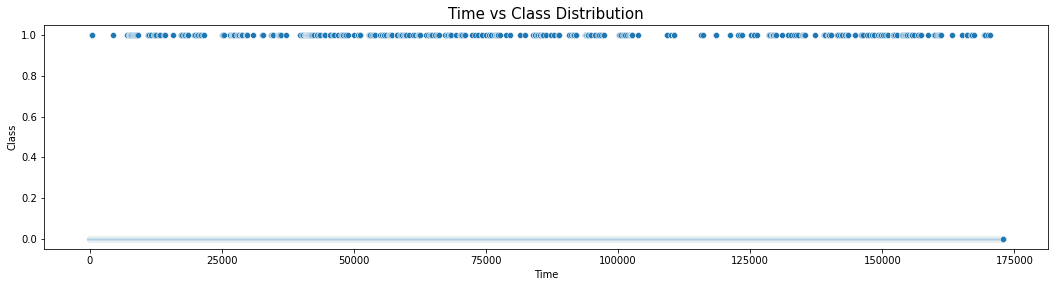

In [ ]:
# now we use a scatter plot to check for the distribution of the class with Time - using timedelta

Delta_Time = pd.to_timedelta(df['Time'], unit='s')

df['Day'] = (Delta_Time.dt.components.days).astype(int)
df['Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Min'] = (Delta_Time.dt.components.minutes).astype(int)

# bivariate analysis

fig = plt.figure(figsize=(18, 14))
cmap = sns.color_palette('Set2')

# Plotting the relation between the variables: Time vs Class

plt.subplot(3,1,1)
sns.scatterplot(x=df['Time'], y='Class', palette=cmap, data=df)
plt.xlabel('Time', size=10)
plt.ylabel('Class', size=10)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10) 
plt.title('Time vs Class Distribution', size=15, y=1)

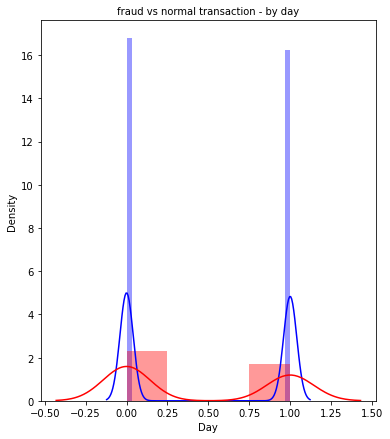

In [ ]:
# fraud vs normal transaction - by day
plt.figure(figsize=(6,7))
sns.distplot(df[df['Class'] == 0]["Day"], color='blue')
sns.distplot(df[df['Class'] == 1]["Day"], color='red')
plt.title('fraud vs normal transaction - by day', fontsize=10)
plt.show()

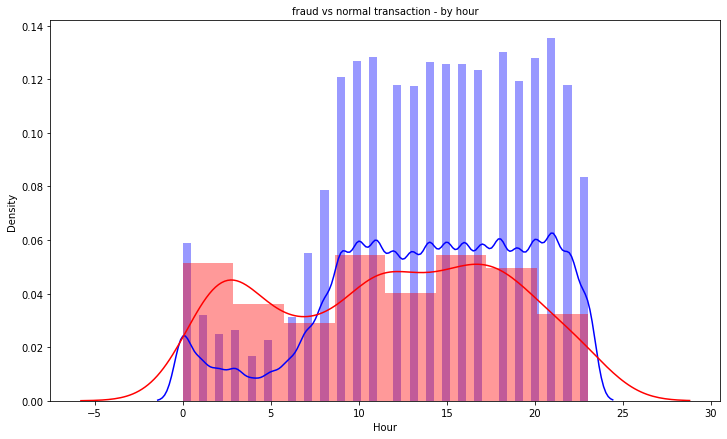

In [ ]:
# fraud vs normal transaction - by hour
plt.figure(figsize=(12,7))
sns.distplot(df[df['Class'] == 0]["Hour"], color='blue')
sns.distplot(df[df['Class'] == 1]["Hour"], color='red')
plt.title('fraud vs normal transaction - by hour', fontsize=10)
plt.show()

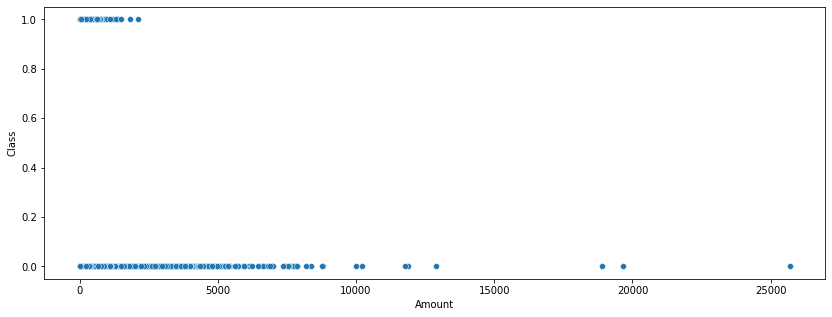

In [ ]:
# bivariateanalysis: scatter plot -> classes vs Amount

fig = plt.figure(figsize=(14, 5))
cmap = sns.color_palette('Set1')

sns.scatterplot(x=df['Amount'], y='Class', palette=cmap, data=df)
plt.xlabel('Amount', size=10)
plt.ylabel('Class', size=10)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10) 
plt.show()

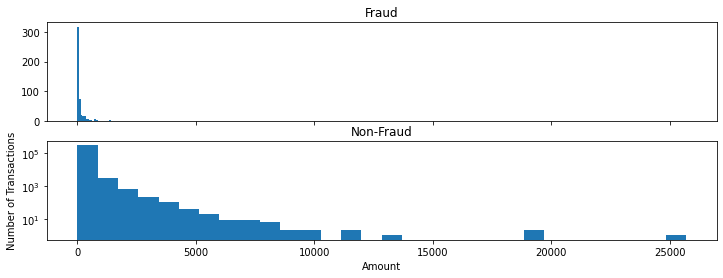

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(df.Amount[df.Class == 1], bins = 30)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = 30)
ax2.set_title('Non-Fraud')

plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [ ]:
# chekcing for essential variables having correlation to our target variable

corr_initial = df.corr()['Class']
corr_initial = pd.DataFrame(corr_initial) # converting series to df 
corr_initial.columns = ["Correlation"] # 'correlation'

corr_initial_sort = corr_initial.sort_values(by=['Correlation'], ascending=False) # sorting DESC
corr_initial_sort.head(5)

,Correlation
Class,1.000000
V11,0.154876
V4,0.133447
V2,0.091289
V21,0.040413


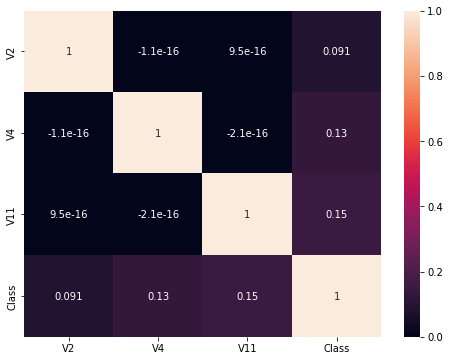

In [ ]:
# plotting above on Heatmap

top_feature = df_corr.index[abs(df_corr['Class']>0.09)] # here we are take values only with a corr >0.09
plt.subplots(figsize=(8, 6))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

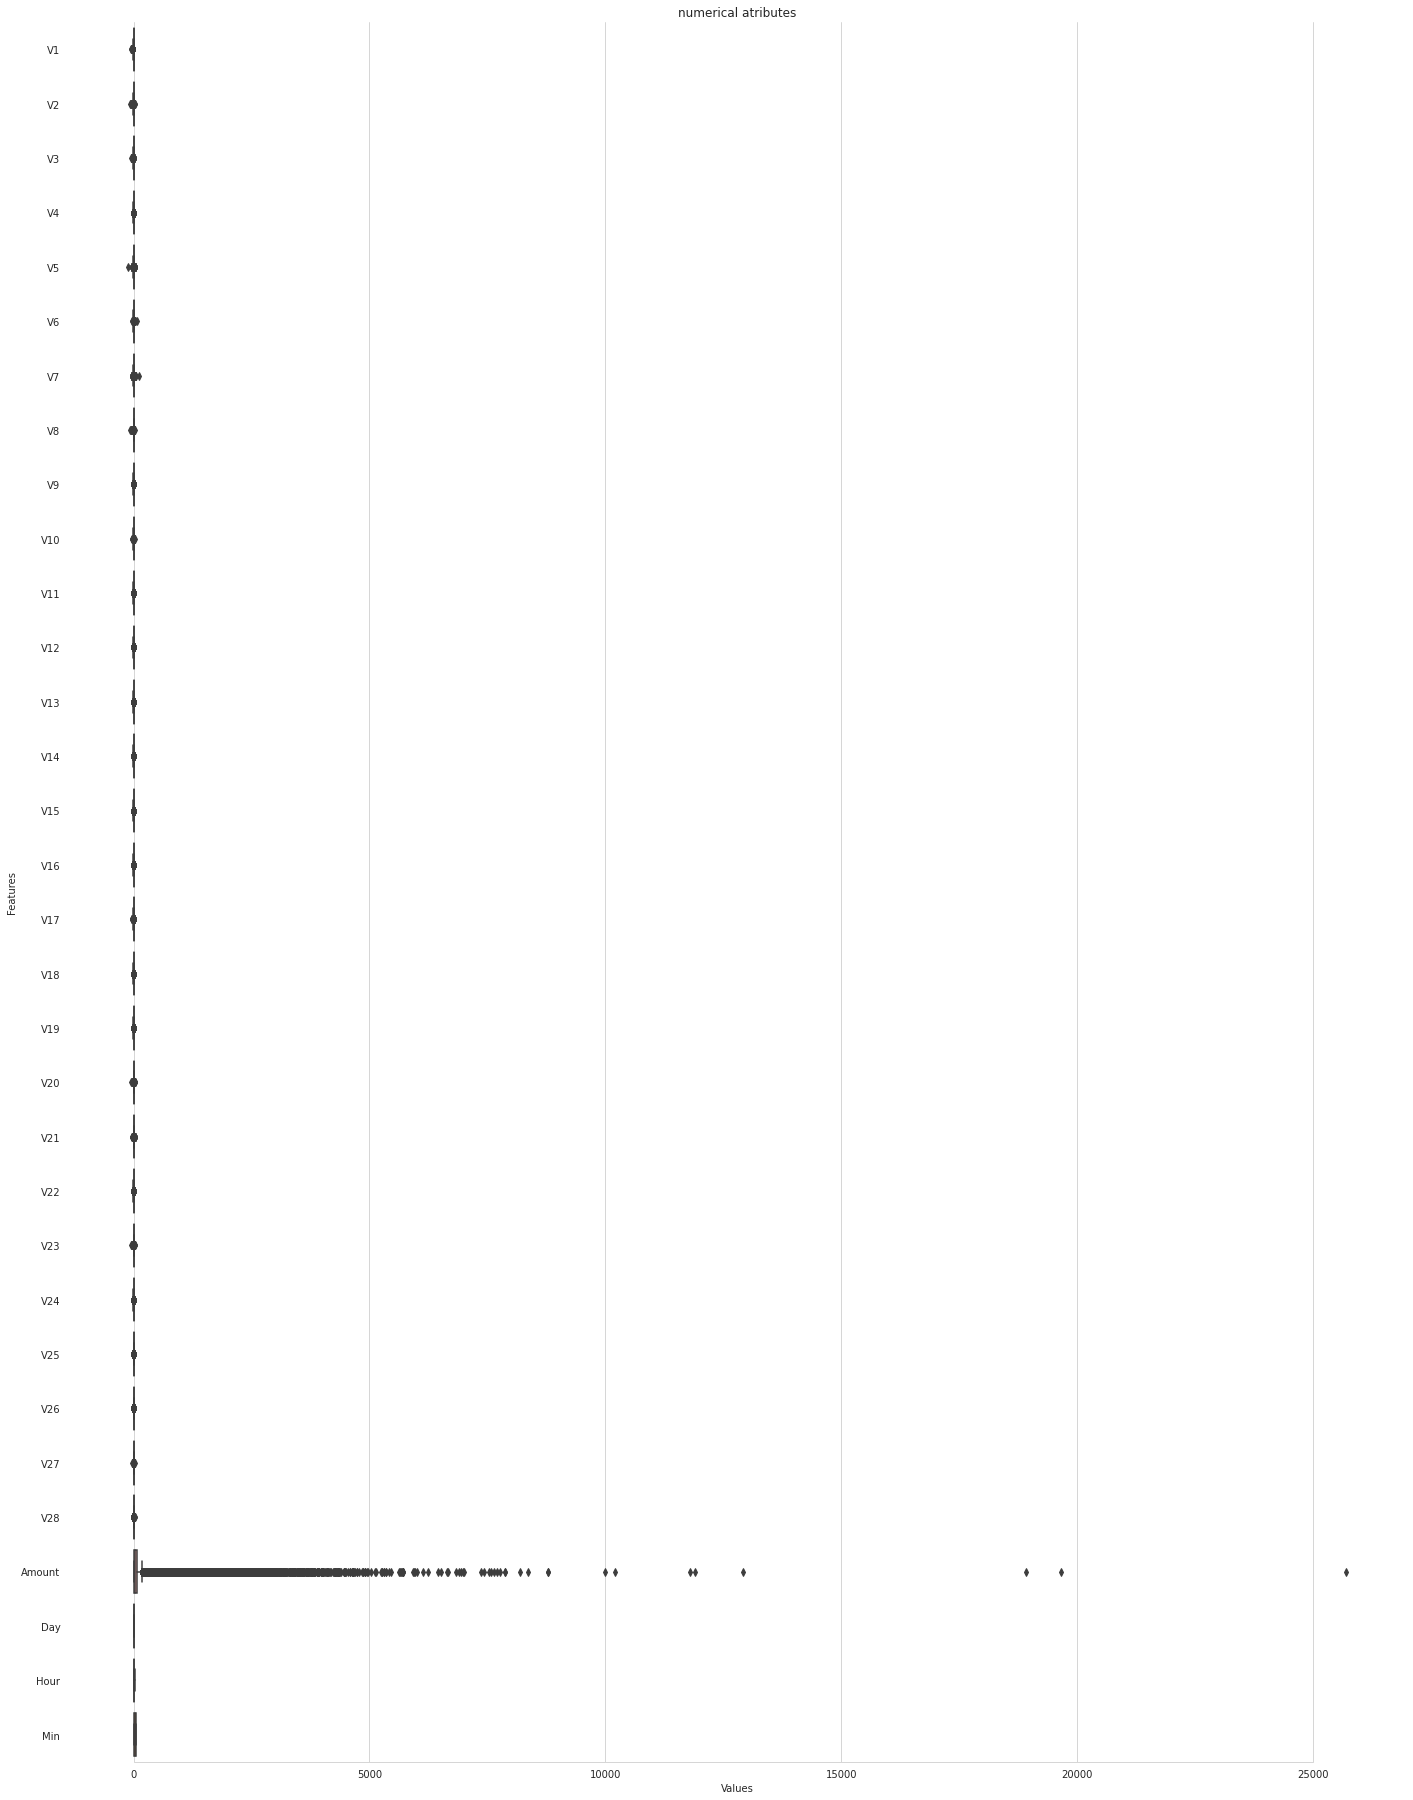

In [ ]:
# checking out numeric features in the df

numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Excluding BINARY target feature and Time variable as its not needed for transformation : 
not_plot = ['Class','Time']
transform_num_feats = [c for c in list(numeric_features) if c not in not_plot]

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(24,32))

ax = sns.boxplot(data=df[transform_num_feats] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values")
ax.set(title="numerical atributes")
sns.despine(trim=True,left=True)

In [ ]:
# dropping unnecessary cols - like Time, Day & Min, but we keep Hours
df.drop(['Time','Day', 'Min'], axis = 1, inplace= True)

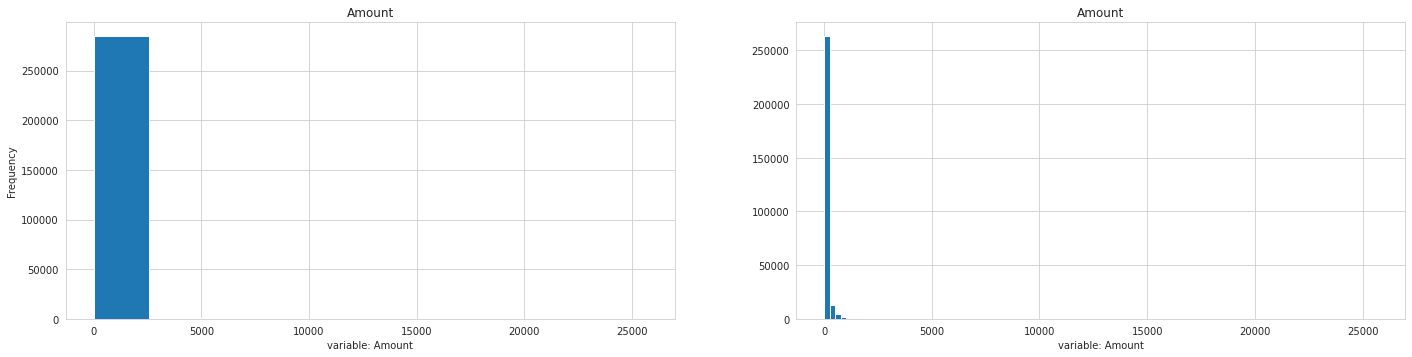

In [ ]:
# analyzing the Amount variable
plt.figure(figsize=(24, 12))

plt.subplot(2,2,1)
plt.title('Amount')
df['Amount'].astype(int).plot.hist();
plt.xlabel("variable: Amount")

plt.subplot(2,2,2)
plt.title('Amount')
sns.set()
plt.xlabel("variable: Amount")
plt.hist(df['Amount'],bins=100)
plt.show()

In [ ]:
# splitting data into train & test 
y= df['Class']
X = df.drop(['Class'], axis=1)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Scale amount by log
df['amount_log'] = np.log(df.Amount + 0.01)

#Scale amount by Standardization
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
df['amount_scaled'] = ss.fit_transform(df['Amount'].values.reshape(-1,1))

#Scale amount by Normalization
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
df['amount_minmax'] = norm.fit_transform(df['Amount'].values.reshape(-1,1))

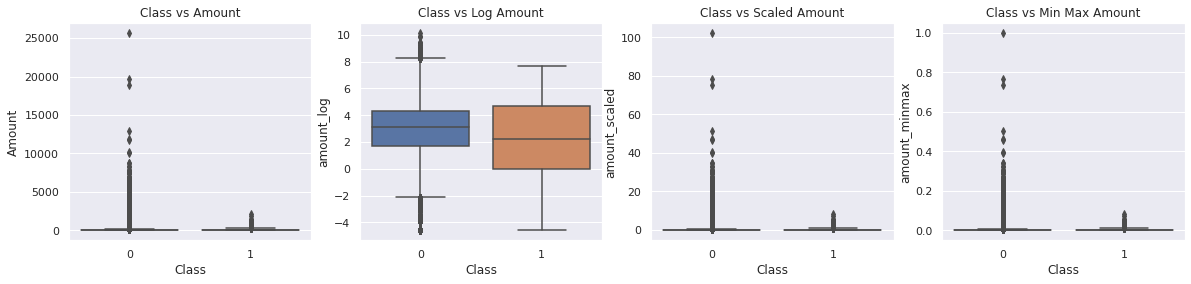

In [ ]:
fig,axs = plt.subplots(nrows = 1 , ncols = 4 , figsize = (20,4))

sns.boxplot(x ="Class",y="Amount",data=df, ax = axs[0])
axs[0].set_title("Class vs Amount")

sns.boxplot(x ="Class",y="amount_log",data=df, ax = axs[1])
axs[1].set_title("Class vs Log Amount")

sns.boxplot(x ="Class",y="amount_scaled",data=df, ax = axs[2])
axs[2].set_title("Class vs Scaled Amount")

sns.boxplot(x ="Class",y="amount_minmax",data=df, ax = axs[3])
axs[3].set_title("Class vs Min Max Amount")

plt.show()

In [ ]:
X = df.drop(['Class','Amount','amount_minmax','amount_scaled'],axis=1)
y = df['Class']

In [ ]:
# importing
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, shuffle=True)

print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

print('\n')
print('............')
print('\n')

rus= RandomUnderSampler(sampling_strategy='majority')
X_train_under,y_train_under=rus.fit_resample(X_train, y_train)
X_test_under, y_test_under = X_test, y_test

print("X_train_under: ",X_train_under.shape)
print("y_train_under: ",y_train_under.shape)
print("X_test_under: ",X_test_under.shape)
print("y_test_under: ",y_test_under.shape)

X_train:  (199364, 30)
y_train:  (199364,)
X_test:  (85443, 30)
y_test:  (85443,)


............


X_train_under:  (666, 30)
y_train_under:  (666,)
X_test_under:  (85443, 30)
y_test_under:  (85443,)


In [ ]:
# prepare dataset for all these class imbalanced methods

In [ ]:
# Random Under Sample Dataset

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, shuffle=True)

print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

print('\n')
print('............')
print('\n')

rus= RandomUnderSampler(sampling_strategy='majority')
X_train_under,y_train_under=rus.fit_resample(X_train, y_train)
X_test_under, y_test_under = X_test, y_test

print("X_train_under: ",X_train_under.shape)
print("y_train_under: ",y_train_under.shape)
print("X_test_under: ",X_test_under.shape)
print("y_test_under: ",y_test_under.shape)

X_train:  (199364, 30)
y_train:  (199364,)
X_test:  (85443, 30)
y_test:  (85443,)


............


X_train_under:  (674, 30)
y_train_under:  (674,)
X_test_under:  (85443, 30)
y_test_under:  (85443,)


In [ ]:
# Random Over Sampler Dataset

In [ ]:

print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

print('\n')
print('............')
print('\n')

ros= RandomOverSampler(sampling_strategy='minority')
X_train_over,y_train_over=ros.fit_resample(X_train, y_train)
X_test_over, y_test_over = X_test, y_test

print("X_train_over: ",X_train_over.shape)
print("y_train_over: ",y_train_over.shape)
print("X_test_over: ",X_test_over.shape)
print("y_test_over: ",y_test_over.shape)

X_train:  (199364, 30)
y_train:  (199364,)
X_test:  (85443, 30)
y_test:  (85443,)


............


X_train_over:  (398054, 30)
y_train_over:  (398054,)
X_test_over:  (85443, 30)
y_test_over:  (85443,)


In [ ]:
# SMOTE Dataset

In [ ]:

print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

print('\n')
print('............')
print('\n')


smote= SMOTE(sampling_strategy='minority')
X_train_smote,y_train_smote=smote.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = X_test, y_test

print("X_train_smote: ",X_train_smote.shape)
print("y_train_smote: ",y_train_smote.shape)
print("X_test_smote: ",X_test_smote.shape)
print("y_test_smote: ",y_test_smote.shape)

X_train:  (199364, 30)
y_train:  (199364,)
X_test:  (85443, 30)
y_test:  (85443,)


............


X_train_smote:  (398054, 30)
y_train_smote:  (398054,)
X_test_smote:  (85443, 30)
y_test_smote:  (85443,)


In [ ]:
# ADASYN Dataset

In [ ]:
print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

print('\n')
print('............')
print('\n')
 

adasyn= ADASYN(sampling_strategy='minority')
X_train_adasyn,y_train_adasyn=adasyn.fit_resample(X_train, y_train)
X_test_adasyn, y_test_adasyn = X_test, y_test

print("X_train_adasyn: ",X_train_adasyn.shape)
print("y_train_adasyn: ",y_train_adasyn.shape)
print("X_test_adasyn: ",X_test_adasyn.shape)
print("y_test_adasyn: ",y_test_adasyn.shape)

X_train:  (199364, 30)
y_train:  (199364,)
X_test:  (85443, 30)
y_test:  (85443,)


............


X_train_adasyn:  (398078, 30)
y_train_adasyn:  (398078,)
X_test_adasyn:  (85443, 30)
y_test_adasyn:  (85443,)


In [ ]:
# ROC Curve

In [ ]:
names=[]
aucs_tests = []
accuracy_tests = []
precision_tests = []
recall_tests = []
f1_score_tests = []

def performance(model):
    for name, model, X_train, y_train, X_test, y_test in model:
        
        #appending name
        names.append(name)
        
        # Build model
        model.fit(X_train, y_train)
        
        #predictions
        y_test_pred = model.predict(X_test)
        
        # calculate accuracy
        Accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
        accuracy_tests.append(Accuracy_test)
        
        # calculate auc
        Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
        aucs_tests.append(Aucs_test)
        
        #precision_calculation
        Precision_score_test = metrics.precision_score(y_test , y_test_pred)
        precision_tests.append(Precision_score_test)
        
        # calculate recall
        Recall_score_test = metrics.recall_score(y_test , y_test_pred)
        recall_tests.append(Recall_score_test)
        
        #calculating F1
        F1Score_test = metrics.f1_score(y_test , y_test_pred)
        f1_score_tests.append(F1Score_test)
        
        # draw confusion matrix
        cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
        
        print("Model Name :", name)
        print("Test Accuracy :", Accuracy_test)
        print("Test AUC : ", Aucs_test)
        print("Test Precision :",Precision_score_test)
        print("Test Recall:", Recall_score_test)
        print("Test F1 : ", F1Score_test)
        print("Confusion Matrix : \n", cnf_matrix)
        print("\n")

        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
        auc = metrics.roc_auc_score(y_test, y_test_pred)
        plt.plot(fpr,tpr,linewidth=2, label=name + ", auc="+str(auc))
    
    plt.legend(loc=4)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()

In [ ]:
# CLASSIFICATION ALGORITHMS

In [ ]:
# -- 1. CLASSIFICATION ALGORITHMS --> LogisticRegression

Model Name : LR IMBALANCED
Test Accuracy : 0.999133925541004
Test AUC :  0.8160293699374567
Test Precision : 0.8521739130434782
Test Recall: 0.632258064516129
Test F1 :  0.7259259259259259
Confusion Matrix : 
 [[85271    17]
 [   57    98]]


Model Name : LR UNDERSAMPLE
Test Accuracy : 0.9549875355500158
Test AUC :  0.9420334820010228
Test Precision : 0.03618999748680573
Test Recall: 0.9290322580645162
Test F1 :  0.06966618287373004
Confusion Matrix : 
 [[81453  3835]
 [   11   144]]


Model Name : LR OVERSAMPLE
Test Accuracy : 0.9752583593740857
Test AUC :  0.9489673697619603
Test Precision : 0.06369710467706013
Test Recall: 0.9225806451612903
Test F1 :  0.11916666666666667
Confusion Matrix : 
 [[83186  2102]
 [   12   143]]


Model Name : LR SMOTE
Test Accuracy : 0.9753402853364231
Test AUC :  0.9490084071880929
Test Precision : 0.06389633601429848
Test Recall: 0.9225806451612903
Test F1 :  0.11951525282072711
Confusion Matrix : 
 [[83193  2095]
 [   12   143]]


Model Name : LR ADAS

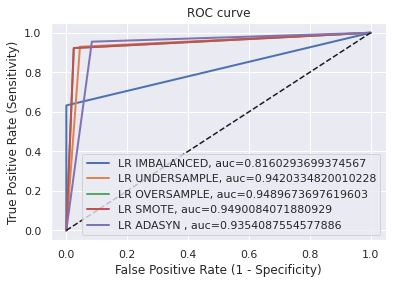

In [ ]:
from sklearn.linear_model import LogisticRegression

LRmodel=[]

LRmodel.append(('LR IMBALANCED', LogisticRegression(solver='saga',multi_class='multinomial'),X_train, y_train, X_test, y_test))
LRmodel.append(('LR UNDERSAMPLE', LogisticRegression(solver='saga',multi_class='multinomial'),X_train_under, y_train_under, X_test_under, y_test_under))
LRmodel.append(('LR OVERSAMPLE', LogisticRegression(solver='saga',multi_class='multinomial'),X_train_over, y_train_over, X_test_over, y_test_over))
LRmodel.append(('LR SMOTE', LogisticRegression(solver='saga',multi_class='multinomial'),X_train_smote, y_train_smote, X_test_smote, y_test_smote))
LRmodel.append(('LR ADASYN ', LogisticRegression(solver='saga',multi_class='multinomial'),X_train_adasyn, y_train_adasyn, X_test_adasyn, y_test_adasyn))

# CHECK PERFORMANCE
performance(LRmodel)

In [ ]:
#  Random Forest Classifier

Model Name : RF IMABALANCED
Test Accuracy : 0.9995435553526912
Test AUC :  0.8838533802735928
Test Precision : 0.9754098360655737
Test Recall: 0.7677419354838709
Test F1 :  0.8592057761732852
Confusion Matrix : 
 [[85285     3]
 [   36   119]]


Model Name : RF UNDERSAMPLE
Test Accuracy : 0.9726601359970974
Test AUC :  0.9380060652181149
Test Precision : 0.05688744412840309
Test Recall: 0.9032258064516129
Test F1 :  0.10703363914373089
Confusion Matrix : 
 [[82967  2321]
 [   15   140]]


Model Name : RF OVERSAMPLE
Test Accuracy : 0.9995318516437859
Test AUC :  0.8935073496706415
Test Precision : 0.9457364341085271
Test Recall: 0.7870967741935484
Test F1 :  0.8591549295774648
Confusion Matrix : 
 [[85281     7]
 [   33   122]]


Model Name : RF SMOTE
Test Accuracy : 0.9995318516437859
Test AUC :  0.92248684533013
Test Precision : 0.891156462585034
Test Recall: 0.8451612903225807
Test F1 :  0.8675496688741723
Confusion Matrix : 
 [[85272    16]
 [   24   131]]


Model Name : RF ADASYN
T

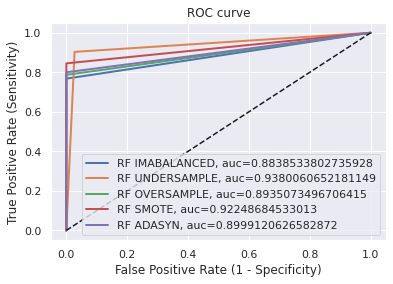

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFmodel = []

RFmodel.append(('RF IMABALANCED', RandomForestClassifier(),X_train,y_train,X_test,y_test))
RFmodel.append(('RF UNDERSAMPLE', RandomForestClassifier(),X_train_under, y_train_under, X_test_under, y_test_under))
RFmodel.append(('RF OVERSAMPLE', RandomForestClassifier(),X_train_over, y_train_over, X_test_over, y_test_over))
RFmodel.append(('RF SMOTE', RandomForestClassifier(),X_train_smote, y_train_smote, X_test_smote, y_test_smote))
RFmodel.append(('RF ADASYN', RandomForestClassifier(),X_train_adasyn, y_train_adasyn, X_test_adasyn, y_test_adasyn))

# CHECK PERFORMANCE 
performance(RFmodel)

In [ ]:
# 3. Gaussian Naïve Bayes Classifier

Model Name : NB IMBALANCED
Test Accuracy : 0.9773182121414277
Test AUC :  0.9113598403587391
Test Precision : 0.06405867970660147
Test Recall: 0.8451612903225807
Test F1 :  0.11909090909090908
Confusion Matrix : 
 [[83374  1914]
 [   24   131]]


Model Name : NB UNDERSAMPLE
Test Accuracy : 0.9705066535585127
Test AUC :  0.917607703386779
Test Precision : 0.05089251804025826
Test Recall: 0.864516129032258
Test F1 :  0.09612625538020085
Confusion Matrix : 
 [[82789  2499]
 [   21   134]]


Model Name : NB OVERSAMPLE
Test Accuracy : 0.9732804325690811
Test AUC :  0.9157771694236756
Test Precision : 0.05555555555555555
Test Recall: 0.8580645161290322
Test F1 :  0.10435464888191447
Confusion Matrix : 
 [[83027  2261]
 [   22   133]]


Model Name : NB SMOTE
Test Accuracy : 0.9735847290006203
Test AUC :  0.9159295941493112
Test Precision : 0.05616554054054054
Test Recall: 0.8580645161290322
Test F1 :  0.10543004359889022
Confusion Matrix : 
 [[83053  2235]
 [   22   133]]


Model Name : NB AD

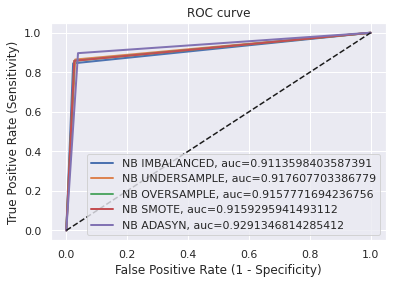

In [ ]:
from sklearn.naive_bayes import GaussianNB

NBmodel = []

NBmodel.append(('NB IMBALANCED', GaussianNB(),X_train,y_train,X_test,y_test))
NBmodel.append(('NB UNDERSAMPLE', GaussianNB(),X_train_under, y_train_under, X_test_under, y_test_under))
NBmodel.append(('NB OVERSAMPLE', GaussianNB(),X_train_over, y_train_over, X_test_over, y_test_over))
NBmodel.append(('NB SMOTE', GaussianNB(),X_train_smote, y_train_smote, X_test_smote, y_test_smote))
NBmodel.append(('NB ADASYN', GaussianNB(),X_train_adasyn, y_train_adasyn, X_test_adasyn, y_test_adasyn))

# CHECK PERFORMANCE 
performance(NBmodel)

In [ ]:
# 4. Decision Tree Classifier

Model Name : DT IMBALANCED
Test Accuracy : 0.9989934810341398
Test AUC :  0.8771379553452288
Test Precision : 0.7090909090909091
Test Recall: 0.7548387096774194
Test F1 :  0.7312500000000001
Confusion Matrix : 
 [[85240    48]
 [   38   117]]


Model Name : DT UNDERSAMPLE
Test Accuracy : 0.892606767084489
Test AUC :  0.9043465253214157
Test Precision : 0.015260612573885009
Test Recall: 0.9161290322580645
Test F1 :  0.03002114164904863
Confusion Matrix : 
 [[76125  9163]
 [   13   142]]


Model Name : DT OVERSAMPLE
Test Accuracy : 0.999204147794436
Test AUC :  0.8869033120417802
Test Precision : 0.7843137254901961
Test Recall: 0.7741935483870968
Test F1 :  0.7792207792207791
Confusion Matrix : 
 [[85255    33]
 [   35   120]]


Model Name : DT SMOTE
Test Accuracy : 0.9972964432428637
Test AUC :  0.8762878943753385
Test Precision : 0.3774193548387097
Test Recall: 0.7548387096774194
Test F1 :  0.503225806451613
Confusion Matrix : 
 [[85095   193]
 [   38   117]]


Model Name : DT ADASYN
T

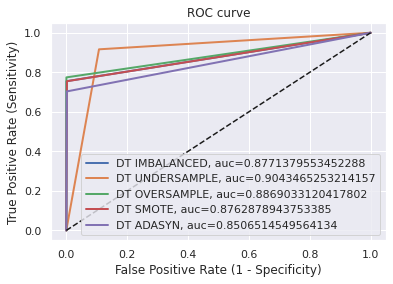

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DTmodel = []

DTmodel.append(('DT IMBALANCED', DecisionTreeClassifier(),X_train,y_train,X_test,y_test))
DTmodel.append(('DT UNDERSAMPLE', DecisionTreeClassifier(),X_train_under, y_train_under, X_test_under, y_test_under))
DTmodel.append(('DT OVERSAMPLE', DecisionTreeClassifier(),X_train_over, y_train_over, X_test_over, y_test_over))
DTmodel.append(('DT SMOTE', DecisionTreeClassifier(),X_train_smote, y_train_smote, X_test_smote, y_test_smote))
DTmodel.append(('DT ADASYN', DecisionTreeClassifier() ,X_train_adasyn, y_train_adasyn, X_test_adasyn, y_test_adasyn))

performance(DTmodel)

In [ ]:
# 5. KNN - K-Nearest Neighbor Classifier

Model Name : KNN IMBALANCE
Test Accuracy : 0.9994733330992591
Test AUC :  0.8709384294882463
Test Precision : 0.9583333333333334
Test Recall: 0.7419354838709677
Test F1 :  0.8363636363636364
Confusion Matrix : 
 [[85283     5]
 [   40   115]]


Model Name : KNN UNDERSAMPLE
Test Accuracy : 0.9746029516753859
Test AUC :  0.9357592945042377
Test Precision : 0.06061927605756651
Test Recall: 0.896774193548387
Test F1 :  0.11356209150326797
Confusion Matrix : 
 [[83134  2154]
 [   16   139]]


Model Name : KNN OVERSAMPLE
Test Accuracy : 0.9990519995786665
Test AUC :  0.9029268194897894
Test Precision : 0.7102272727272727
Test Recall: 0.8064516129032258
Test F1 :  0.7552870090634441
Confusion Matrix : 
 [[85237    51]
 [   30   125]]


Model Name : KNN SMOTE
Test Accuracy : 0.9978114064346991
Test AUC :  0.9184051154191795
Test Precision : 0.4452054794520548
Test Recall: 0.8387096774193549
Test F1 :  0.5816554809843401
Confusion Matrix : 
 [[85126   162]
 [   25   130]]


Model Name : KNN ADA

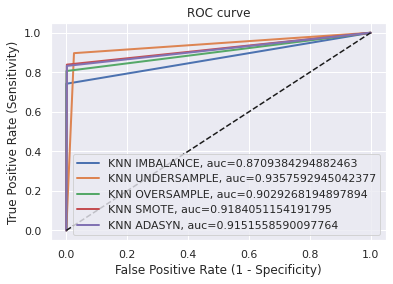

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 

KNNmodel = []

KNNmodel.append(('KNN IMBALANCE', KNeighborsClassifier(),X_train,y_train,X_test,y_test))
KNNmodel.append(('KNN UNDERSAMPLE', KNeighborsClassifier(),X_train_under, y_train_under, X_test_under, y_test_under))
KNNmodel.append(('KNN OVERSAMPLE', KNeighborsClassifier(),X_train_over, y_train_over, X_test_over, y_test_over))
KNNmodel.append(('KNN SMOTE', KNeighborsClassifier(),X_train_smote, y_train_smote, X_test_smote, y_test_smote))
KNNmodel.append(('KNN ADASYN', KNeighborsClassifier(),X_train_adasyn, y_train_adasyn, X_test_adasyn, y_test_adasyn))

# check fro performance
performance(KNNmodel)

In [ ]:
# 6. XG Boost Classifier
xgb=[]

Model Name : XGBOOST IMBALANCED
Test Accuracy : 0.9995552590615966
Test AUC :  0.9096187944603635
Test Precision : 0.927007299270073
Test Recall: 0.8193548387096774
Test F1 :  0.8698630136986302
Confusion Matrix : 
 [[85278    10]
 [   28   127]]


Model Name : XGBOOST UNDERSAMPLE
Test Accuracy : 0.9064171435928046
Test AUC :  0.9273639826803151
Test Precision : 0.018070067609096498
Test Recall: 0.9483870967741935
Test F1 :  0.03546441495778046
Confusion Matrix : 
 [[77300  7988]
 [    8   147]]


Model Name : XGBOOST OVERSAMPLE
Test Accuracy : 0.9994850368081645
Test AUC :  0.9256833393345053
Test Precision : 0.8627450980392157
Test Recall: 0.8516129032258064
Test F1 :  0.8571428571428572
Confusion Matrix : 
 [[85267    21]
 [   23   132]]


Model Name : XGBOOST SMOTE
Test Accuracy : 0.9982561473731025
Test AUC :  0.9218478339803505
Test Precision : 0.51171875
Test Recall: 0.8451612903225807
Test F1 :  0.6374695863746959
Confusion Matrix : 
 [[85163   125]
 [   24   131]]


Model Name

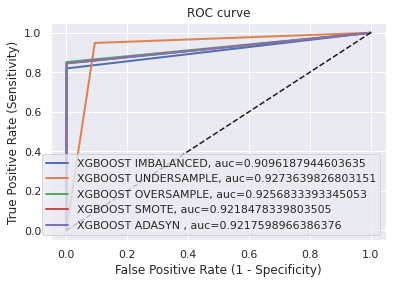

In [ ]:
from xgboost import XGBClassifier

xgb.append(('XGBOOST IMBALANCED', XGBClassifier(n_estimators = 1000, verbosity = 1, scale_pos_weight = 580),X_train, y_train, X_test, y_test))
xgb.append(('XGBOOST UNDERSAMPLE',XGBClassifier(n_estimators = 1000, verbosity = 1, scale_pos_weight = 580),X_train_under, y_train_under, X_test_under, y_test_under))
xgb.append(('XGBOOST OVERSAMPLE', XGBClassifier(n_estimators = 1000, verbosity = 1, scale_pos_weight = 580),X_train_over, y_train_over, X_test_over, y_test_over))
xgb.append(('XGBOOST SMOTE', XGBClassifier(n_estimators = 1000, verbosity = 1, scale_pos_weight = 580),X_train_smote, y_train_smote, X_test_smote, y_test_smote))
xgb.append(('XGBOOST ADASYN ', XGBClassifier(n_estimators = 1000, verbosity = 1, scale_pos_weight = 580),X_train_adasyn, y_train_adasyn, X_test_adasyn, y_test_adasyn))

# check for performance of xgboost
performance(xgb)